# 03.10 Initial time and products visualizations

### This script containst the following points:
### 1. Import data and libraries
### 2. Create bar chart
### 3. Create histogram
### 4. Create scatterplot
### 5. Create line chart

### 1. Import data and libraries

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 4\05-10-2023 Instacart Basket Analysis'

In [5]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

### 2. Create bar chart

[Text(0, 0, '6,204,182'),
 Text(0, 0, '5,660,230'),
 Text(0, 0, '4,496,490'),
 Text(0, 0, '4,213,830'),
 Text(0, 0, '4,205,791'),
 Text(0, 0, '3,840,534'),
 Text(0, 0, '3,783,802')]

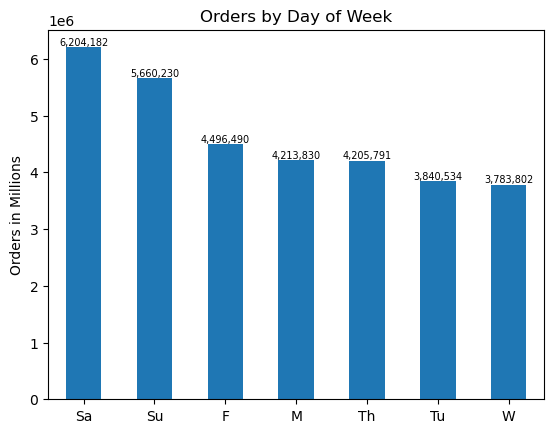

In [7]:
# Create a bar chart of "orders day of week" column

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

# Set tickmarks x-axis labels
bar.set_xticklabels(['Sa','Su','F','M','Th','Tu','W'], rotation = 0)

# Set label for y-axis
bar.set_ylabel( "Orders in Millions")

# Set title 
bar.set_title("Orders by Day of Week")

# Bar labels
bar.bar_label(bar.containers[0], fmt='{:,.0f}', size=7)

In [8]:
# Exporting chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 3. Create histogram

<Axes: ylabel='Frequency'>

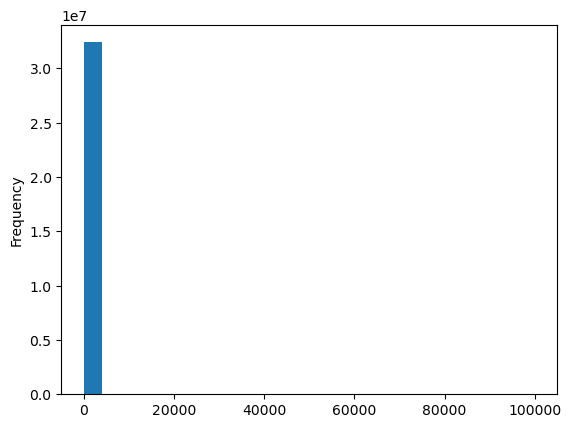

In [7]:
# Create histogram of "prices" column

ords_prods_merge['prices'].plot.hist(bins = 25)

### 4. Create scatterplot

<Axes: xlabel='prices', ylabel='prices'>

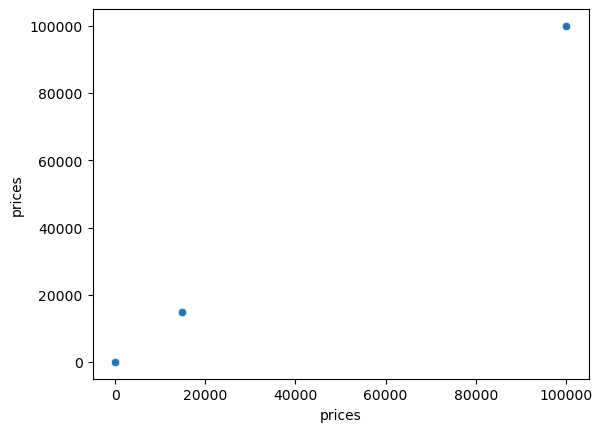

In [8]:
# Create scatterplot chart of "prices" column

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [9]:
# Check for outlier values

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
10030345,171,912404,17,12,2,14,5.0,21553,5,0,...,Regularly busy,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,181,603376,17,22,6,16,4.0,21553,3,1,...,Regularly busy,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,1944,3264360,135,2,2,21,13.0,21553,6,0,...,Regularly busy,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,1945,892534,135,3,0,8,12.0,21553,3,1,...,Busiest day,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,5708,229704,342,8,1,19,30.0,21553,9,0,...,Regularly busy,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,29,0,8,4.0,33664,1,0,...,Busiest day,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,3386544,2363282,204099,31,0,9,2.0,33664,1,1,...,Busiest day,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3391313,3181945,204395,13,3,15,8.0,33664,25,0,...,Regularly busy,High-range product,Least busy,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,3405096,2486215,205227,7,3,20,4.0,33664,8,0,...,Regularly busy,High-range product,Least busy,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [10]:
# Mark outlier "prices" values as missing

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [11]:
ords_prods_merge['prices'].max()

25.0

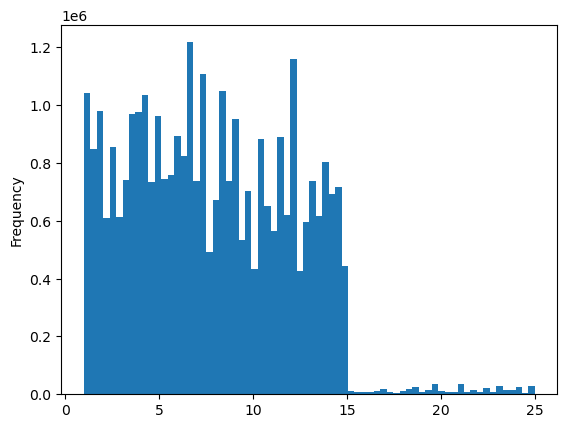

In [12]:
# Retry histogram of "prices" column

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [13]:
# Export viz

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### 5. Create a line chart

In [14]:
# Split the dataframe into 70/30 samples, True/False values <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [17]:
# Store 30 of the sample in the datafram small

small = ords_prods_merge[~dev]

In [18]:
# Check results

len(ords_prods_merge)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
# Filter out just the "orders_days_of_week" and "prices" columns

df_2 = small[['orders_day_of_week','prices']]

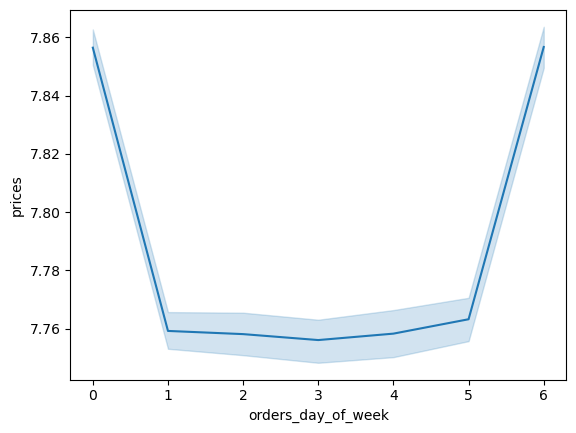

In [21]:
# Create a line chart of the small dataset

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [22]:
# Export line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

In [23]:
# Export dataset

ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_viz.pkl'))